In [ ]:
import os

# Directory path where the files are located
directory = '/Users/omgarg/Desktop/projects/IR_project/data'

# Iterate over the files in the directory
for filename in os.listdir(directory):
    # Check if the filename matches the pattern
    if filename.startswith('CF-AN-equities-') and filename.endswith('.csv'):
        # Split the filename by '-' and get the part containing the company name
        parts = filename.split('-')
        company_name = parts[3]
        
        # Rename the file to the company name
        old_path = os.path.join(directory, filename)
        new_path = os.path.join(directory, f"{company_name}.csv")
        os.rename(old_path, new_path)
        print(f"File renamed from {filename} to {company_name}.csv")


In [20]:
import os
import pandas as pd
import requests
import PyPDF2
import wget

# Function to download PDF from URL and extract text
def download_and_extract_text(url):
    try:
        # Download PDF from URL
        print(url)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
        response = wget.download(url)
        print(response)
        with open('temp.pdf', 'wb') as file:
            file.write(response.content)
        
        # Extract text from PDF
        with open('file.pdf', 'rb') as file:
            pdf_reader = PyPDF2.PdfFileReader(file)
            text = ''
            for page_number in range(pdf_reader.numPages):
                page = pdf_reader.getPage(page_number)
                text += page.extractText()
        
        return text
    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        return None

# Directory containing CSV files
directory = '/Users/omgarg/Desktop/projects/IR_project/data'

# Iterate over CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        
        # Read CSV file
        df = pd.read_csv(filepath)
        
        # Extract text from PDF URLs and store in a new column
        df['pdf_text'] = df['ATTACHMENT'].apply(download_and_extract_text)
        
        # Save the updated DataFrame with PDF text to a new CSV file
        new_filename = f"updated_{filename}"
        new_filepath = os.path.join(directory, new_filename)
        df.to_csv(new_filepath, index=False)
        
        print(f"Processed {filename}. PDF text extracted and saved to {new_filename}")

    break


https://nsearchives.nseindia.com/corporate/BHARTIARTL_17022024150028_Reg30DoTPenaltyFeb17.pdf


KeyboardInterrupt: 

In [18]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=64f345ad235f4fdecdcd2ebb032b179c34dfe39ed19cdf943477458032012314
  Stored in directory: /Users/omgarg/Library/Caches/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [15]:
from nsepython import *
response = nsefetch("https://nsearchives.nseindia.com/corporate/BHARTIARTL_17022024150028_Reg30DoTPenaltyFeb17.pdf")
print(response)
with open('temp.pdf', 'wb') as file:
    file.write(response.content)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [4]:
from datetime import datetime, timedelta, date
import pandas as pd
import requests
import json
import math
import warnings
from time import sleep
import pytz
import requests
import zipfile
import os

months = {'Jan': 1,'Feb': 2,'Mar': 3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

headers = {
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "en-US, en, q-0.9",
    "user-agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Mobile Safari/537.36",
}

session = requests.Session()
errors = []
def giveCurrentTime():
  current_time = datetime.now()
  ist_timezone = pytz.timezone('Asia/Kolkata')
  return current_time.astimezone(ist_timezone)

curr_date = giveCurrentTime().date()

def main_function(url):
    request = session.get("http://www.nseindia.com/", headers=headers, timeout=10)
    cookies = dict(request.cookies)

    data = session.get(url, headers=headers, cookies=cookies, timeout=10)

    filename = url.split("/")[-1]

    response = data
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print("File downloaded successfully:", filename)

        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('.')
        print("File extracted successfully.")

        os.remove(filename)
        print("ZIP file removed.")
    else:
        print("Failed to download the file.")


main_function("https://nsearchives.nseindia.com/annual_reports/AR_18389_ITC_2020_2021_13072021230506_14072021070003.zip")

File downloaded successfully: AR_18389_ITC_2020_2021_13072021230506_14072021070003.zip
File extracted successfully.
ZIP file removed.


In [25]:
data_urls = []

In [32]:
import requests
from tqdm import tqdm

def get_links_pdf(company):
    url = f"https://www.nseindia.com/api/corp-info?symbol={company}&corpType=annualreport&market=cm"
    headers = {
        "accept-encoding": "gzip, deflate, br",
        "accept-language": "en-US, en, q-0.9",
        "user-agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Mobile Safari/537.36",
    }

    session = requests.Session()
    try:
        # Send the request
        request = session.get("http://www.nseindia.com/", headers=headers, timeout=10)
        cookies = dict(request.cookies)

        response = session.get(url, headers=headers, cookies=cookies, timeout=10)
        response.raise_for_status()  # Raise an exception for HTTP errors

        data = response.json()
        for report in data:
            data_urls.append(report)
    except requests.exceptions.RequestException as e:
        print("Error:", e)

import pandas as pd
stocks = pd.read_csv("ind_nifty50list.csv")['Symbol']

for stock in tqdm(stocks):
    get_links_pdf(stock)


100%|██████████| 50/50 [00:43<00:00,  1.15it/s]


In [4]:
import json

# Assuming data.json is in the current directory
json_file = "data.json"

# Read data from JSON file
with open(json_file, "r") as f:
    data_urls = json.load(f)

data_urls

[{'companyName': 'Adani Enterprises Limited',
  'fromYr': '2022',
  'toYr': '2023',
  'fileName': 'https://nsearchives.nseindia.com/annual_reports/AR_22076_ADANIENT_2022_2023_27062023004013_06272023070001.zip'},
 {'companyName': 'Adani Enterprises Limited',
  'fromYr': '2021',
  'toYr': '2022',
  'fileName': 'https://nsearchives.nseindia.com/annual_reports/AR_20208_ADANIENT_2021_2022_04072022234642_07052022070005.zip'},
 {'companyName': 'Adani Enterprises Limited',
  'fromYr': '2020',
  'toYr': '2021',
  'fileName': 'https://nsearchives.nseindia.com/annual_reports/AR_18166_ADANIENT_2020_2021_20062021142831_20062021150007.zip'},
 {'companyName': 'Adani Enterprises Limited',
  'fromYr': '2019',
  'toYr': '2020',
  'fileName': 'https://nsearchives.nseindia.com/annual_reports/AR_16271_ADANIENT_2019_2020_03062020185415.zip'},
 {'companyName': 'Adani Enterprises Limited',
  'fromYr': '2018',
  'toYr': '2019',
  'fileName': 'https://nsearchives.nseindia.com/annual_reports/AR_14897_ADANIENT_20

In [7]:
import pandas as pd
import os
import requests
import zipfile
from zipfile import BadZipFile
from tqdm import tqdm

headers = {
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "en-US, en, q-0.9",
    "user-agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Mobile Safari/537.36",
}

session = requests.Session()
request = session.get("http://www.nseindia.com/", headers=headers, timeout=20)
cookies = dict(request.cookies)

def download_and_extract_file(url, output_dir):
    # try:

    response = session.get(url, headers=headers, cookies=cookies, timeout=20)

    response.raise_for_status()  # Raise an exception for HTTP errors
    
    # Extract the file name from the URL
    filename = os.path.join(output_dir, url.split("/")[-1])
    
    # Save the file locally
    with open(filename, 'wb') as f:
        f.write(response.content)
    
    # try:
    #     with zipfile.ZipFile(filename, 'r') as zip_ref:
    #         zip_ref.extractall(output_dir)
    # except BadZipFile:
    #     print("Error: File is not a valid ZIP file:", filename)
    #     return None
    
    # # Remove the ZIP file
    # os.remove(filename)
    
    return os.path.join(output_dir, filename.split('/')[-1])

    # except requests.exceptions.RequestException as e:
    #     print("Error downloading file:", e)

    #     return None 


# Output directory for saving the downloaded files
output_dir = "./RE_Download"

# Initialize lists to store the data
company_names = []
file_names = []
file_paths = []

errors = []

# Iterate over each data URL
for data in tqdm(data_urls):
    try:
        company_name = data['companyName']
        file_name = data['fileName']
        
        # Download and extract the file
        file_path = download_and_extract_file(file_name, output_dir)
            
        if file_path:
            # Append data to lists
            company_names.append(company_name)
            file_names.append(os.path.basename(file_name))
            file_paths.append(file_path)

    except Exception as e:
        print(e)
        errors.append(data)

# Create a DataFrame
df = pd.DataFrame({
    'CompanyName': company_names,
    'FileName': file_names,
    'FilePath': file_paths
})

# Display the DataFrame
print(df)


 15%|█▍        | 99/667 [01:40<08:25,  1.12it/s]

string indices must be integers, not 'str'
string indices must be integers, not 'str'


 62%|██████▏   | 412/667 [06:15<04:49,  1.13s/it]

404 Client Error: Not Found for url: https://nsearchives.nseindia.com/annual_reports/AR_20335_LT_2021_2022_12072022184900_07122022190003.zip


 84%|████████▍ | 563/667 [08:52<11:59,  6.92s/it]

HTTPSConnectionPool(host='nsearchives.nseindia.com', port=443): Read timed out.


100%|██████████| 667/667 [10:44<00:00,  1.04it/s]

                   CompanyName  \
0    Adani Enterprises Limited   
1    Adani Enterprises Limited   
2    Adani Enterprises Limited   
3    Adani Enterprises Limited   
4    Adani Enterprises Limited   
..                         ...   
658              Wipro Limited   
659              Wipro Limited   
660              Wipro Limited   
661              Wipro Limited   
662              Wipro Limited   

                                              FileName  \
0    AR_22076_ADANIENT_2022_2023_27062023004013_062...   
1    AR_20208_ADANIENT_2021_2022_04072022234642_070...   
2    AR_18166_ADANIENT_2020_2021_20062021142831_200...   
3       AR_16271_ADANIENT_2019_2020_03062020185415.zip   
4    AR_14897_ADANIENT_2018_2019_15072019194810_150...   
..                                                 ...   
658         AR_3795_WIPRO_2013_2014_15072014130942.zip   
659          AR_824_WIPRO_2012_2013_30072013175311.zip   
660         AR_2507_WIPRO_2011_2012_17102013140013.zip   
661        

In [8]:
errors

['data',
 'msg',
 {'companyName': 'Larsen & Toubro Limited',
  'fromYr': '2021',
  'toYr': '2022',
  'fileName': 'https://nsearchives.nseindia.com/annual_reports/AR_20335_LT_2021_2022_12072022184900_07122022190003.zip'},
 {'companyName': 'Tata Motors Limited',
  'fromYr': '2015',
  'toYr': '2016',
  'fileName': 'https://nsearchives.nseindia.com/annual_reports/AR_9326_TATAMOTORS_2015_2016_16082016155325.zip'}]

In [14]:
df.to_pickle("pdf_data.pickle")

In [19]:
import pandas as pd

df = pd.read_csv("df_pdfs.csv")
df

,Unnamed: 0,CompanyName,StockName,Year,ZipFileName,ZipFilePath,ExtractedFilePath
0,0,Adani Enterprises Limited,ADANIENT,2022-2023,AR_22076_ADANIENT_2022_2023_27062023004013_062...,./RE_Download/AR_22076_ADANIENT_2022_2023_2706...,drive/MyDrive/extracted_pdfs/AR_22076_ADANIENT...
1,1,Adani Enterprises Limited,ADANIENT,2021-2022,AR_20208_ADANIENT_2021_2022_04072022234642_070...,./RE_Download/AR_20208_ADANIENT_2021_2022_0407...,drive/MyDrive/extracted_pdfs/AR_20208_ADANIENT...
2,2,Adani Enterprises Limited,ADANIENT,2020-2021,AR_18166_ADANIENT_2020_2021_20062021142831_200...,./RE_Download/AR_18166_ADANIENT_2020_2021_2006...,drive/MyDrive/extracted_pdfs/AR_18166_ADANIENT...
3,3,Adani Enterprises Limited,ADANIENT,2019-2020,AR_16271_ADANIENT_2019_2020_03062020185415.zip,./RE_Download/AR_16271_ADANIENT_2019_2020_0306...,drive/MyDrive/extracted_pdfs/AR_2019_2020.pdf
4,4,Adani Enterprises Limited,ADANIENT,2019-2020,AR_16271_ADANIENT_2019_2020_03062020185415.zip,./RE_Download/AR_16271_ADANIENT_2019_2020_0306...,drive/MyDrive/extracted_pdfs/BRR_SR_2019_2020.pdf
...,...,...,...,...,...,...,...
896,896,Wipro Limited,WIPRO,2012-2013,AR_824_WIPRO_2012_2013_30072013175311.zip,./RE_Download/AR_824_WIPRO_2012_2013_300720131...,drive/MyDrive/extracted_pdfs/AR_2012_2013.pdf
897,897,Wipro Limited,WIPRO,2012-2013,AR_824_WIPRO_2012_2013_30072013175311.zip,./RE_Download/AR_824_WIPRO_2012_2013_300720131...,drive/MyDrive/extracted_pdfs/FormA_2012_2013.pdf
898,898,Wipro Limited,WIPRO,2011-2012,AR_2507_WIPRO_2011_2012_17102013140013.zip,./RE_Download/AR_2507_WIPRO_2011_2012_17102013...,drive/MyDrive/extracted_pdfs/AR_2507_WIPRO_201...
899,899,Wipro Limited,WIPRO,2010-2011,AR_WIPRO_2010_2011_21062012112036.zip,./RE_Download/AR_WIPRO_2010_2011_2106201211203...,drive/MyDrive/extracted_pdfs/AR_WIPRO_2010_201...


/var/folders/qc/wd01w3x56bn2nwy39wpkmpxm0000gn/T/ipykernel_42308/2593869034.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=stock_counts.values, x=stock_counts.index, palette='viridis')


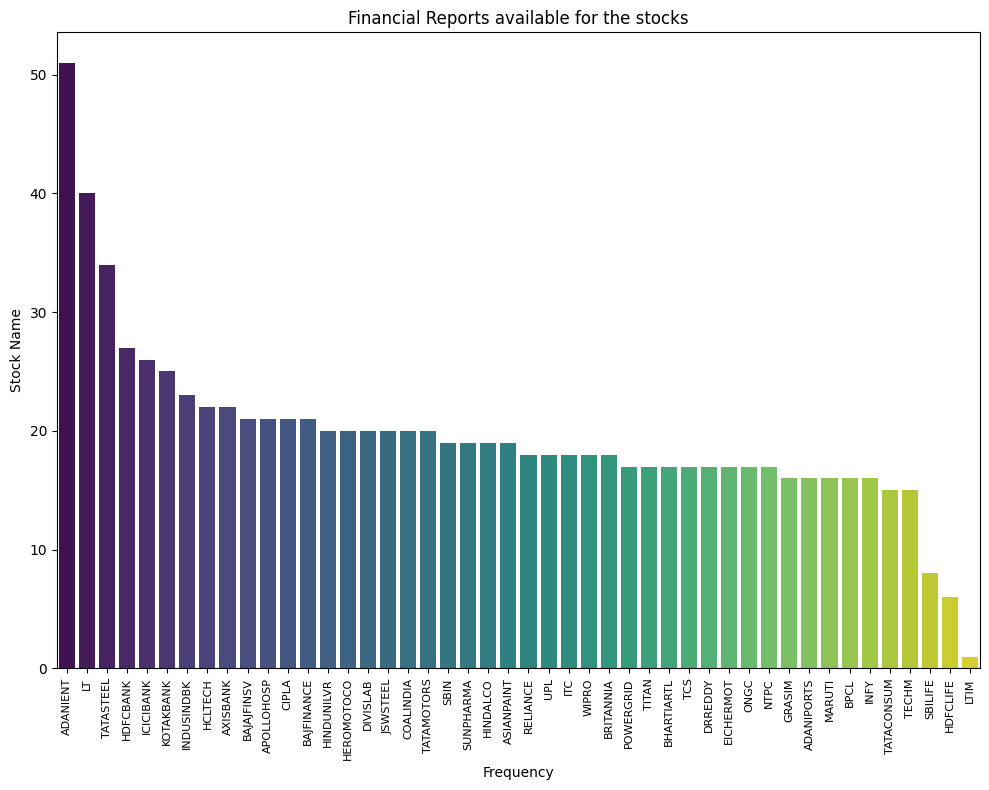

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your DataFrame with the stock counts
stock_counts = df['StockName'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(y=stock_counts.values, x=stock_counts.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Stock Name')
plt.title('Financial Reports available for the stocks')
plt.xticks(rotation=90)  # Rotate stock labels vertically
plt.tick_params(axis='x', labelsize=8)  # Set font size for stock labels
plt.tight_layout()
plt.show()

100%|██████████| 50/50 [00:00<00:00, 97.12it/s] 
/var/folders/qc/wd01w3x56bn2nwy39wpkmpxm0000gn/T/ipykernel_42308/3729484618.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stock', y='Rows', data=shapes_df, palette='viridis')


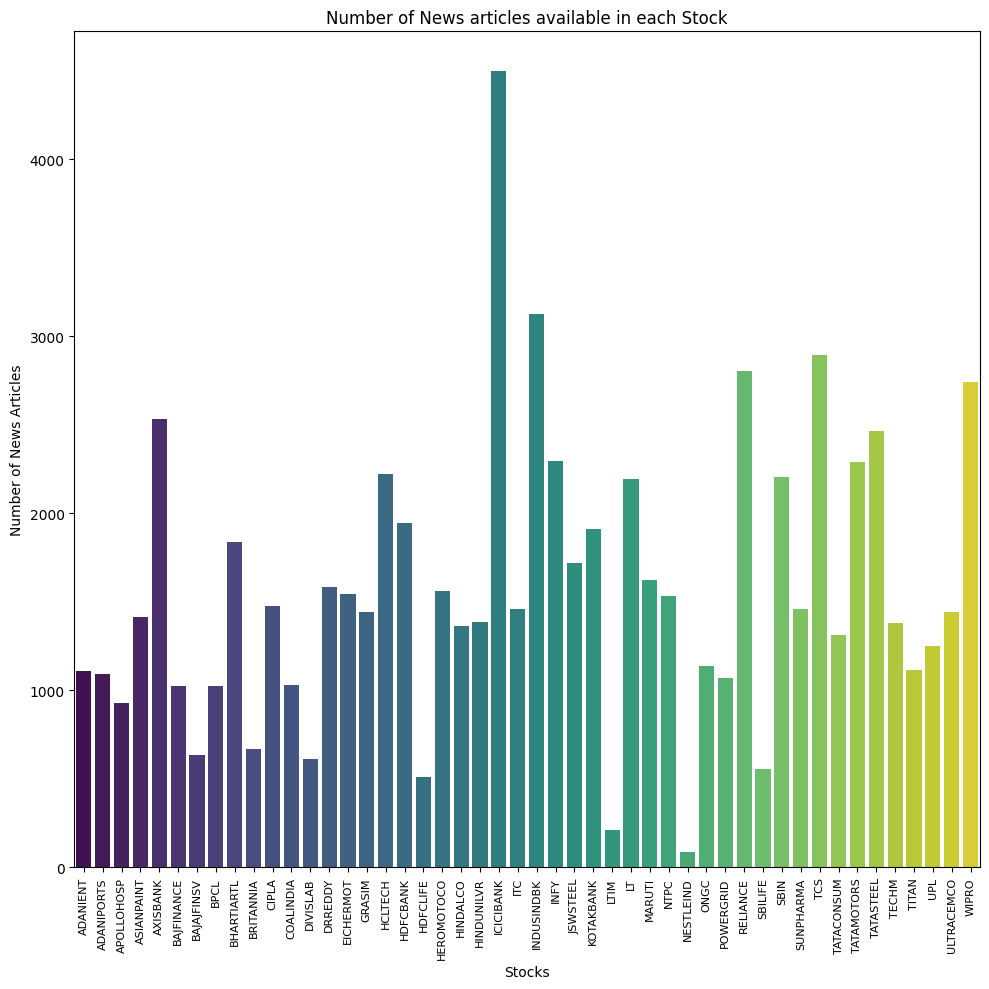

In [17]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm 

stocks = pd.read_csv("ind_nifty50list.csv")['Symbol']

shapes = {'Stock': [], 'Rows': []}

for stock in tqdm(stocks):
    file_path = os.path.join("data/", f"{stock}.csv")
    
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        rows, columns = df.shape
        
        shapes['Stock'].append(stock)
        shapes['Rows'].append(rows)

shapes_df = pd.DataFrame(shapes)

plt.figure(figsize=(10, 10))
sns.barplot(x='Stock', y='Rows', data=shapes_df, palette='viridis')
plt.xlabel('Stocks')
plt.ylabel('Number of News Articles')
plt.title('Number of News articles available in each Stock')
plt.xticks(rotation=90)  # Rotate stock labels vertically
plt.tick_params(axis='x', labelsize=8)  # Set font size for stock labels
plt.tight_layout()
plt.show()
